# CITS4403: Computational Modelling - Group Project
## Corona Virus Outbreak 
## This dataset is from Kaggle
### By Jayden Kur, 21988713  Roarke Holland, 21742366, Andrew Ha, 22246801

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

Reads in data from csv file

In [2]:
import pandas as pd
old_file = "PatientInfo.csv" # Last Updated 30th March
new_file = "PatientInfo_2.csv" # Last Updated 19th April
df = pd.read_csv(old_file, usecols = ['patient_id','sex','age','city','confirmed_date'])

In [3]:
df.head()

patient_id     sex  age         city confirmed_date
0  1000000001    male  50s   Gangseo-gu        23/1/20
1  1000000002    male  30s  Jungnang-gu        30/1/20
2  1000000003    male  50s    Jongno-gu        30/1/20
3  1000000004    male  20s      Mapo-gu        30/1/20
4  1000000005  female  20s  Seongbuk-gu        31/1/20

In [4]:
#Use patient_id as the index
df = df.set_index('patient_id')

In [5]:
df.head()

sex  age         city confirmed_date
patient_id                                         
1000000001    male  50s   Gangseo-gu        23/1/20
1000000002    male  30s  Jungnang-gu        30/1/20
1000000003    male  50s    Jongno-gu        30/1/20
1000000004    male  20s      Mapo-gu        30/1/20
1000000005  female  20s  Seongbuk-gu        31/1/20

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 1000000001 to 7000000009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             2765 non-null   object
 1   age             2758 non-null   object
 2   city            2703 non-null   object
 3   confirmed_date  2771 non-null   object
dtypes: object(4)
memory usage: 108.2+ KB


In [7]:
#Drop any row with null value
df = df.dropna(how='any',axis=0);
#Drop any row with 'city' = etc
df = df[~df.city.str.contains("etc")];

# Korea City info - https://www.kaggle.com/kimjihoo/coronavirusdataset/discussion/132763

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 1000000001 to 7000000009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             2655 non-null   object
 1   age             2655 non-null   object
 2   city            2655 non-null   object
 3   confirmed_date  2655 non-null   object
dtypes: object(4)
memory usage: 103.7+ KB


In [9]:
unique_cities = df.city.unique()

In [10]:
len(df.city.unique())

138

In [11]:
unique_cities.sort()

In [12]:
unique_cities

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Chilgok-gun', 'Chuncheon-si', 'Chungju-si', 'Daedeok-gu',
       'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongjak-gu', 'Dongnae-gu', 'Eumseong-gun',
       'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu',
       'Gangneung-si', 'Gangseo-gu', 'Geochang-gun', 'Geoje-si',
       'Geumcheon-gu', 'Geumjeong-gu', 'Gijang-gun', 'Gimcheon-si',
       'Gimhae-si', 'Gimje-si', 'Gimpo-si', 'Goesan-gun', 'Goryeong-gun',
       'Goseong-gun', 'Goyang-si', 'Gumi-si', 'Gunpo-si', 'Gunsan-si',
       'Guri-si', 'Guro-gu', 'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu',
       'Gwangju-si', 'Gwangmyeong-si', 'Gwangyang-si', 'Gyeongju-si',
       'Gyeongsan-si', 'Gyeryong-si

In [13]:
df.confirmed_date.unique()

array(['23/1/20', '30/1/20', '31/1/20', '5/2/20', '6/2/20', '16/2/20',
       '19/2/20', '20/2/20', '21/2/20', '22/2/20', '23/2/20', '26/2/20',
       '24/2/20', '25/2/20', '27/2/20', '28/2/20', '29/2/20', '1/3/20',
       '2/3/20', '4/3/20', '5/3/20', '6/3/20', '7/3/20', '8/3/20',
       '9/3/20', '10/3/20', '11/3/20', '12/3/20', '13/3/20', '14/3/20',
       '15/3/20', '16/3/20', '17/3/20', '18/3/20', '19/3/20', '20/3/20',
       '21/3/20', '22/3/20', '23/3/20', '24/3/20', '25/3/20', '26/3/20',
       '27/3/20', '28/3/20', '29/3/20', '3/3/20', '18/2/20', '26/1/20',
       '27/1/20', '1/2/20', '2/2/20', '9/2/20', '10/2/20', '30/3/20'],
      dtype=object)

In [14]:
len(df.confirmed_date.unique())

54

In [15]:
#df

In [16]:
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%d/%m/%y').dt.strftime('%m%d') # Use this for old version

In [17]:
#df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%Y-%m-%d').dt.strftime('%m%d') # USE THIS FOR NEW VERSIONS

In [18]:
df

sex  age         city confirmed_date
patient_id                                         
1000000001    male  50s   Gangseo-gu           0123
1000000002    male  30s  Jungnang-gu           0130
1000000003    male  50s    Jongno-gu           0130
1000000004    male  20s      Mapo-gu           0130
1000000005  female  20s  Seongbuk-gu           0131
...            ...  ...          ...            ...
7000000005  female  20s      Jeju-do           0324
7000000006    male  30s      Jeju-do           0324
7000000007  female  20s      Jeju-do           0325
7000000008  female  10s      Jeju-do           0327
7000000009  female  20s      Jeju-do           0329

[2655 rows x 4 columns]

### Can change the string below to format dates

In [19]:
#df = df[df['confirmed_date'] < '0230'] # this works for all except date_list in animation

In [20]:
def populate_graph(df):
    graph = nx.Graph()
    for city in unique_cities:
        graph.add_node(city)
    node_names = df['city'].value_counts().index.to_list()
    node_sizes = df['city'].value_counts().to_list()
    labels = {}
    for name,size in zip(node_names,node_sizes):
        labels[name] = name+ '\n' +str(size)
    node_size = [20*node_sizes[ii] for ii in range(len(node_names))]# MADE THIS 20 * COUNT as the values were too small to see
    return graph,node_names,node_sizes,node_size,labels

In [21]:
routes = pd.read_csv("PatientRoute.csv", usecols = ["city","latitude","longitude"])

In [22]:
routes

city   latitude   longitude
0      Gwangjin-gu  37.563992  127.029534
1       Gangbuk-gu  37.592057  127.018898
2       Gangbuk-gu  37.591669  127.018420
3      Seongbuk-gu  37.606498  127.092761
4      Seongbuk-gu  37.612772  127.098167
...            ...        ...         ...
2063   Seongbuk-gu  37.612772  127.098167
2064       Jung-gu  37.460191  126.440696
2065       Mapo-gu  37.578588  126.936251
2066  Seodaemun-gu  37.604279  126.905087
2067  Seodaemun-gu  37.604279  126.905087

[2068 rows x 3 columns]

In [23]:
regions = pd.read_csv("Region.csv", usecols = ["city","latitude","longitude"])

In [24]:
locations = pd.concat([routes,regions]) 

In [25]:
locations

city   latitude   longitude
0     Gwangjin-gu  37.563992  127.029534
1      Gangbuk-gu  37.592057  127.018898
2      Gangbuk-gu  37.591669  127.018420
3     Seongbuk-gu  37.606498  127.092761
4     Seongbuk-gu  37.612772  127.098167
..            ...        ...         ...
238    Hadong-gun  35.067224  127.751271
239     Haman-gun  35.272481  128.406540
240   Hamyang-gun  35.520541  127.725177
241  Hapcheon-gun  35.566702  128.165870
242       Jeju-do  33.488936  126.500423

[2311 rows x 3 columns]

In [26]:
locations = locations.drop_duplicates(subset = "city", ignore_index=True)

In [27]:
locations

city   latitude   longitude
0     Gwangjin-gu  37.563992  127.029534
1      Gangbuk-gu  37.592057  127.018898
2     Seongbuk-gu  37.606498  127.092761
3       Jongno-gu  37.586288  126.999716
4     Gangdong-gu  37.514544  127.106597
..            ...        ...         ...
233    Hadong-gun  35.067224  127.751271
234     Haman-gun  35.272481  128.406540
235   Hamyang-gun  35.520541  127.725177
236  Hapcheon-gun  35.566702  128.165870
237       Jeju-do  33.488936  126.500423

[238 rows x 3 columns]

In [28]:
pos = {}
count = 0
for nn in locations.city:
    pos[nn] = [locations.latitude[count],locations.longitude[count]]
    count = count+1

In [29]:
pos

{'Gwangjin-gu': [37.563992299999995, 127.0295342],
 'Gangbuk-gu': [37.5920573, 127.0188983],
 'Seongbuk-gu': [37.60649779999999, 127.0927615],
 'Jongno-gu': [37.586288200000006, 126.99971570000001],
 'Gangdong-gu': [37.514543700000004, 127.10659709999999],
 'Jung-gu': [37.5683689, 126.97778999999998],
 'Dobong-gu': [37.6201956, 127.0187418],
 'Jungnang-gu': [37.587894899999995, 127.06532150000001],
 'Mapo-gu': [37.5784186, 126.9099561],
 'Seodaemun-gu': [37.6338843, 126.9165592],
 'Nam-gu': [35.8412055, 128.5982428],
 'Gangnam-gu': [37.4778403, 126.98731529999999],
 'Gwachun-si': [37.4350233, 126.991583],
 'Dongdaemun-gu': [37.5573355, 127.07958899999998],
 'Geumcheon-gu': [37.48526, 126.90148700000002],
 'Songpa-gu': [37.5162581, 127.04221399999999],
 'Nowon-gu': [37.6458568, 127.02857890000001],
 'Gwanak-gu': [37.506975399999995, 126.96052309999999],
 'Kangreung-si': [37.7695698, 128.8784958],
 'Namyangju-si': [37.6360028, 127.2165279],
 'Yongsan-gu': [37.527882500000004, 126.9676321

In [30]:
intermediateNodes = set(locations.city).difference(set(unique_cities))

In [31]:
for extra in intermediateNodes:
    if extra in pos:
        del pos[extra]

In [32]:
len(pos)

138

In [33]:
graph,node_names,node_sizes,node_size,labels = populate_graph(df)


In [34]:
#def draw_graph(graph,pos,node_names,node_size,labels):
#    plt.figure(1,figsize=(20,20)) 
#    nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True)
#    plt.axis('equal')
#    plt.show()

In [35]:
def draw_graph_coloured(graph,pos,node_names,node_size,labels,gender=False):
    plt.figure(1,figsize=(20,20))
    if(gender == True):
        node_colours = ["hotpink" if graph.nodes[cities]['Females'] > graph.nodes[cities]['Males'] else "blue" 
                       for cities in graph.nodes]
        nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color=node_colours,labels=labels,with_labels=True)
    else:
        nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True)
    plt.axis('equal')
    plt.show()

In [36]:
draw_graph_coloured(graph,pos,node_names,node_size,labels)

In [185]:
# ADD THE CASES TO EACH NODE
def get_cases(node_names,node_sizes,graph):
    for ii in range(len(node_names)):
        attrs = {node_names[ii]: {'Cases': node_sizes[ii]}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [186]:
graph = get_cases(node_names,node_sizes,graph)

In [187]:
graph.nodes['Gyeongsan-si']['Cases']

631

In [188]:
new_df = df.set_index('city')

In [189]:
# ADD THE GENDER COUNTS TO EACH NODE
def get_gender(new_df):
    new_sort_df = new_df['sex'].sort_index()
    for ii in range(len(new_sort_df)):
        index_city = new_sort_df.index[ii]
        try:
            males = new_sort_df[index_city].value_counts()['male']
        except:
            males = 0
        try:
            females = new_sort_df[index_city].value_counts()['female']
        except:
            females = 0
        attrs = {index_city: {'Males': males, 'Females': females}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [190]:
graph = get_gender(new_df)
print(graph.nodes['Gyeongsan-si'])

{'Cases': 631, 'Males': 209, 'Females': 422}


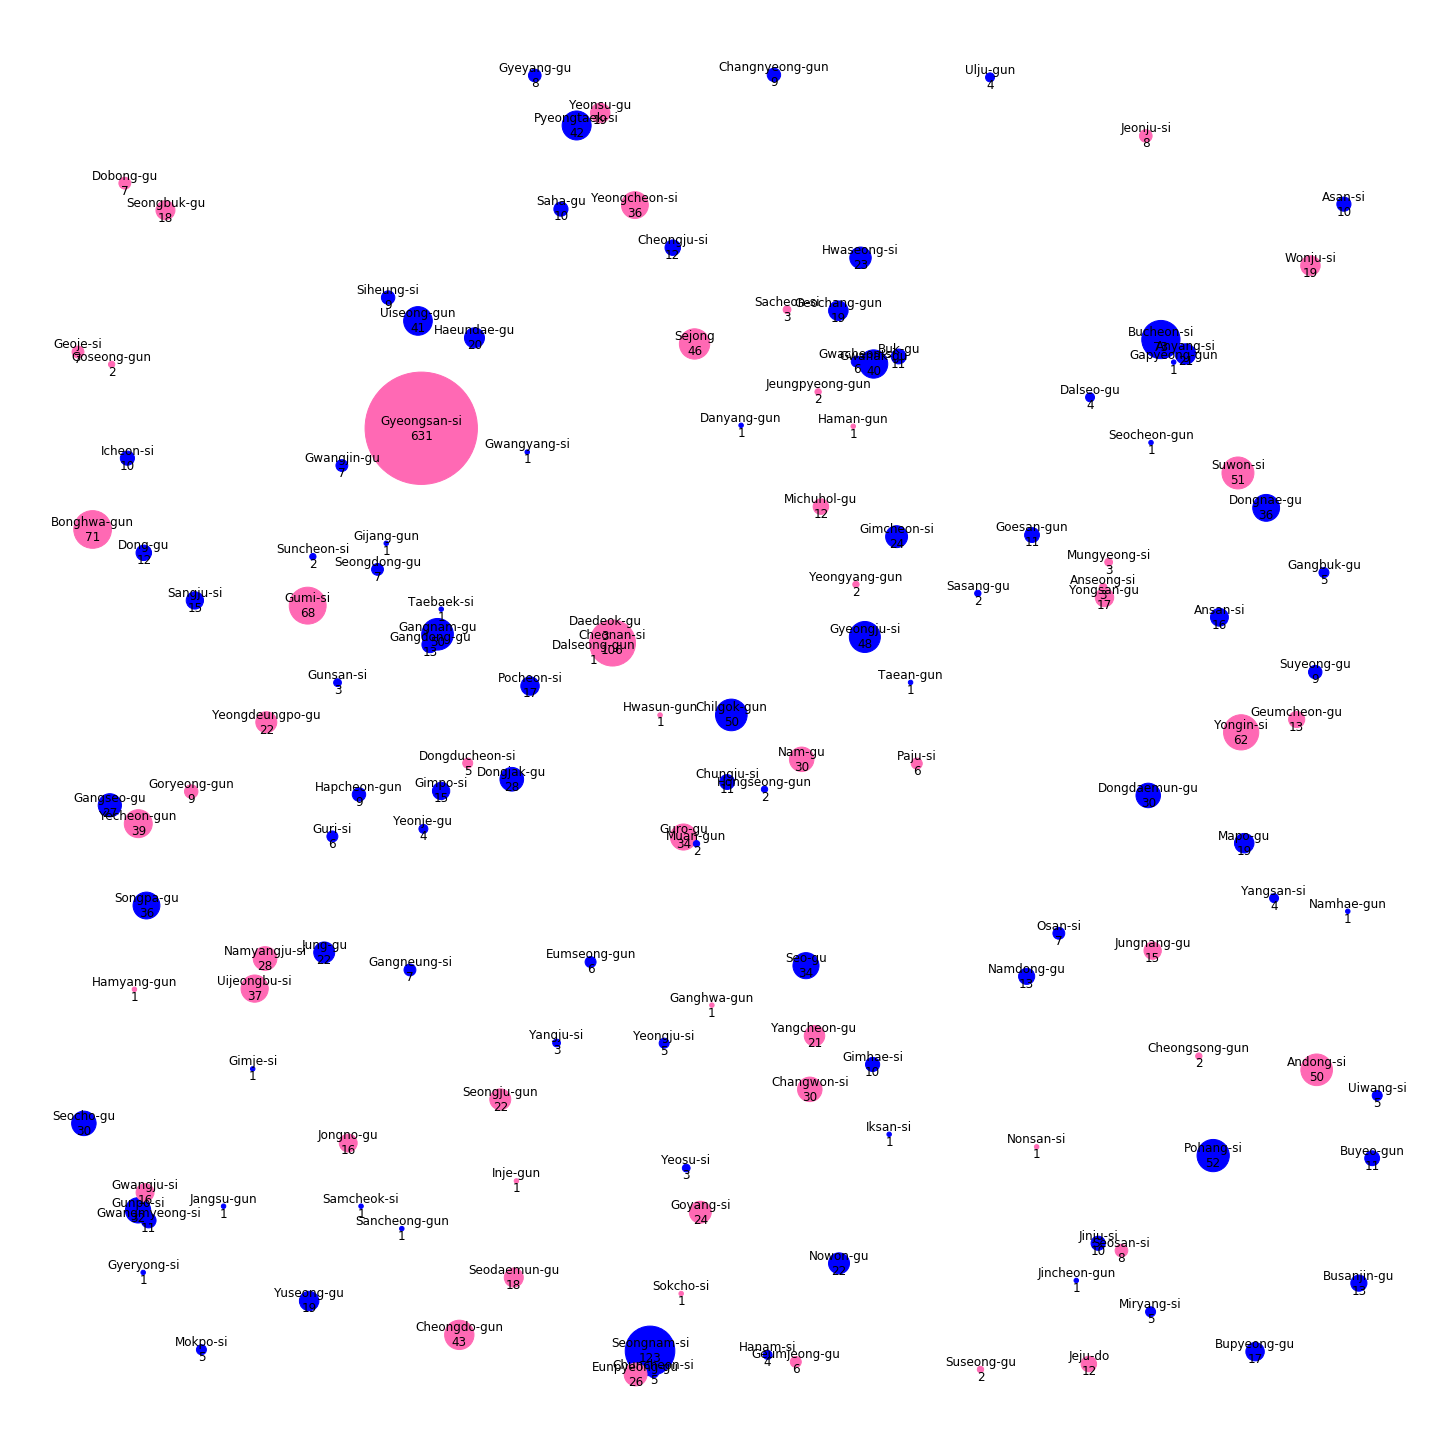

In [191]:
draw_graph_coloured(graph,pos,node_names,node_size,labels,gender=True)

In [192]:
#new_sort_df = new_df['age'].sort_index()

In [193]:
# ADD THE AGE GROUPS TO EACH NODE
def get_age_groups(new_df):
    new_sort_df = new_df['age'].sort_index()
    age_groups = list()
    for ii in range(len(new_sort_df)):
        index_city = new_sort_df.index[ii]
        try:
            zeroes = new_sort_df[index_city].value_counts()['0s']
        except:
            zeroes = 0
        try:
            tens = new_sort_df[index_city].value_counts()['10s']
        except:
            tens = 0
        try:
            twenties = new_sort_df[index_city].value_counts()['20s']
        except:
            twenties = 0
        try:
            thirties = new_sort_df[index_city].value_counts()['30s']
        except:
            thirties = 0
        try:
            fourties = new_sort_df[index_city].value_counts()['40s']
        except:
            fourties = 0
        try:
            fifties = new_sort_df[index_city].value_counts()['50s']
        except:
            fifties = 0
        try:
            sixties = new_sort_df[index_city].value_counts()['60s']
        except:
            sixties = 0
        try:
            seventies = new_sort_df[index_city].value_counts()['70s']
        except:
            seventies = 0
        try:
            eighties = new_sort_df[index_city].value_counts()['80s']
        except:
            eighties = 0
        try:
            nineties = new_sort_df[index_city].value_counts()['90s']
        except:
            nineties = 0
        #attrs = {index_city: {'Age Groups': [zeroes,tens,twenties,thirties,fourties,fifties,sixties,seventies,eighties,nineties]}}
        attrs = {index_city: {'Age Groups': {'0s':zeroes,'10s':tens,'20s':twenties,'30s':thirties,'40s':fourties,'50s':fifties,'60s':sixties,'70s':seventies,'80s':eighties,'90s':nineties}}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [194]:
graph = get_age_groups(new_df)
print(graph.nodes['Gyeongsan-si']['Age Groups']['10s'])
print(graph.nodes['Jungnang-gu'])
print(graph.nodes['Seongbuk-gu'])

24
{'Cases': 15, 'Males': 8, 'Females': 7, 'Age Groups': {'0s': 0, '10s': 1, '20s': 7, '30s': 2, '40s': 2, '50s': 2, '60s': 1, '70s': 0, '80s': 0, '90s': 0}}
{'Cases': 18, 'Males': 7, 'Females': 11, 'Age Groups': {'0s': 0, '10s': 0, '20s': 8, '30s': 3, '40s': 1, '50s': 4, '60s': 2, '70s': 0, '80s': 0, '90s': 0}}


In [195]:
unique_dates = df['confirmed_date'].unique()

In [196]:
unique_dates_list = list(unique_dates)

In [197]:
unique_dates_list.sort()
#unique_dates_list

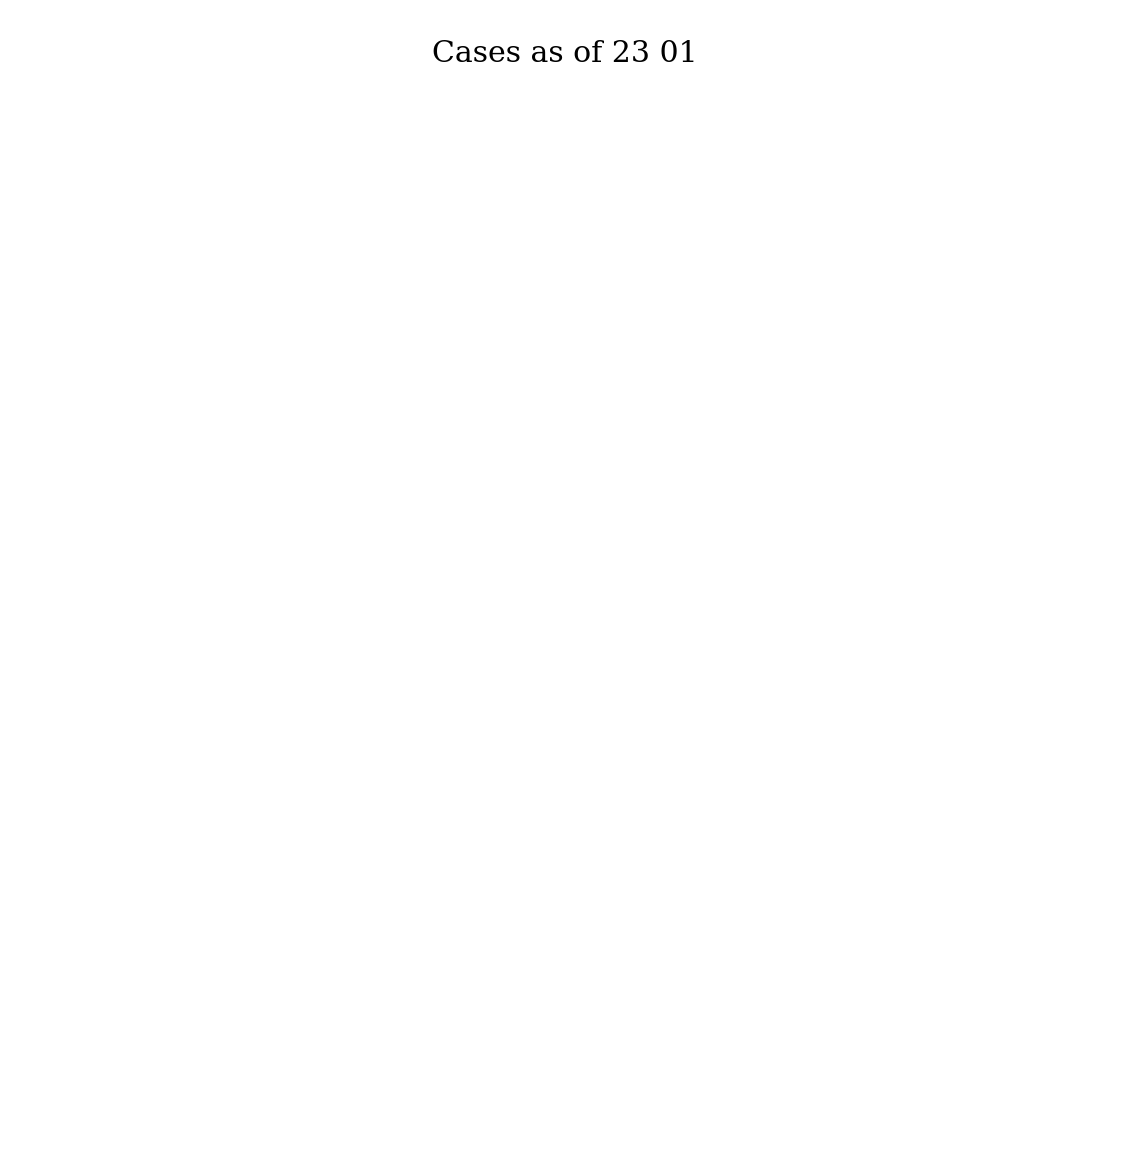

In [198]:
from matplotlib.animation import FuncAnimation
#date_list = ['0123','0130',
#             '0205','0210','0215','0220','0225','0229', 
#             '0305','0310','0315','0320','0325','0330']
date_list = unique_dates_list # this is better
def animate(i):
    fig.clf() # Clears the axis each time
    ax = fig.add_subplot(111)
    #ax.set_aspect('equal')
    new_df = df.set_index('confirmed_date')
    new_df = new_df[new_df.index < date_list[i]]
    text = '\nCases as of ' + date_list[i][2:4] + ' '+ date_list[i][0:2]
    node_names = new_df['city'].value_counts().index.to_list()
    node_sizes = new_df['city'].value_counts().to_list()
    labels = {}
    for name,size in zip(node_names,node_sizes):
        labels[name] = name+ '\n' +str(size)
        
    node_size = [50 * node_sizes[ii] for ii in range(len(node_names))]
    nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True)
    ax.set_title(text, fontsize=30, fontfamily='serif',fontweight='roman')
    
fig = plt.figure(1,figsize=(20,20)) 

anim = FuncAnimation(fig, animate, frames=len(date_list), interval=400, repeat=True) # Animator call
anim.save('covid.gif', writer='imagemagick')

In [110]:
from IPython.display import Image
Image("covid.gif")

In [199]:
def city_printer():
    print('Cases by City:\n')
    for cities in graph.nodes:
        cases = graph.nodes[cities]['Cases']
        if(len(str(cities)) > 13): # FIXES BAD PRINTING
            tab = '\t'
        else:
            tab = '\t\t'
        print(str(cities)+':',tab,cases,('\t\t{0:.3%}').format(cases/total_cases),'of total cases')
    

In [200]:
# THIS LOOKS REALLY MESSY LOL
def age_group_printer():
    zeroes=tens=twenties=thirties=fourties=fifties=sixties=seventies=eighties=nineties = 0
    for cities in graph.nodes:
        zeroes += graph.nodes[cities]['Age Groups']['0s']
        tens += graph.nodes[cities]['Age Groups']['10s']
        twenties += graph.nodes[cities]['Age Groups']['20s']
        thirties += graph.nodes[cities]['Age Groups']['30s']
        fourties += graph.nodes[cities]['Age Groups']['40s']
        fifties += graph.nodes[cities]['Age Groups']['50s']
        sixties += graph.nodes[cities]['Age Groups']['60s']
        seventies += graph.nodes[cities]['Age Groups']['70s']
        eighties += graph.nodes[cities]['Age Groups']['80s']
        nineties += graph.nodes[cities]['Age Groups']['90s']
        
    print('\nCases by Age:\n')
    print('Zeroes:\t\t',zeroes,('\t\t{0:.3%}').format(zeroes/total_cases),'of total cases',
          '\nTens:\t\t',tens,('\t\t{0:.3%}').format(tens/total_cases),'of total cases',
          '\nTwenties:\t',twenties,('\t\t{0:.3%}').format(twenties/total_cases),'of total cases',
          '\nThirties:\t',thirties,('\t\t{0:.3%}').format(thirties/total_cases),'of total cases',
          '\nFourties:\t',fourties,('\t\t{0:.3%}').format(fourties/total_cases),'of total cases',
          '\nFifties:\t',fifties,('\t\t{0:.3%}').format(fifties/total_cases),'of total cases',
          '\nSixties:\t',sixties,('\t\t{0:.3%}').format(sixties/total_cases),'of total cases',
          '\nSeventies:\t',seventies,('\t\t{0:.3%}').format(seventies/total_cases),'of total cases',
          '\nEighties:\t',eighties,('\t\t{0:.3%}').format(eighties/total_cases),'of total cases',
          '\nNineties:\t',nineties,('\t\t{0:.3%}').format(nineties/total_cases),'of total cases')

##Compact version of previous function

In [201]:
def age_group_print_compact():    
    ages = ['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s']
    ages_name = ['Zeroes:','Tens:','Twenties:','Thirties:','Fourties:','Fifties:','Sixties:','Seventies:','Eighties:','Nineties:']
    age_tally = [0 for j in range(10)]
    for age_group in range(len(x)):
        for cities in graph.nodes:
            age_tally[age_group] += graph.nodes[cities]['Age Groups'][x[age_group]]
    sum = np.sum(age_tally)
    for age_group in range(len(x)):
        print("{0:12} \t {1} \t {2:.3%} of total cases".format(ages_name[age_group], age_tally[age_group],age_tally[age_group]/sum ))
    #print('Zeroes:\t\t',zeroes,('\t\t{0:.3%}').format(zeroes/total_cases),'of total cases'.format())

In [202]:
age_group_print_compact()

NameError: name 'x' is not defined

In [203]:
def gender_printer():
    males=females=0
    for cities in graph.nodes:
        males += graph.nodes[cities]['Males']
        females += graph.nodes[cities]['Females']
    print('\nCases by Gender:\n')
    print('Males:\t\t',males,('\t\t{0:.3%}').format(males/total_cases),'of total cases',
          '\nFemales:\t',females,('\t\t{0:.3%}').format(females/total_cases),'of total cases')

In [204]:
graph.nodes['Andong-si']['Age Groups']['20s']

18

In [205]:
total_cases = 0
for cities in graph.nodes:
    total_cases += graph.nodes[cities]['Cases']
print('Total Cases:',total_cases)

Total Cases: 3119


In [206]:
city_printer()

Cases by City:

Andong-si: 		 50 		1.603% of total cases
Ansan-si: 		 16 		0.513% of total cases
Anseong-si: 		 3 		0.096% of total cases
Anyang-si: 		 21 		0.673% of total cases
Asan-si: 		 10 		0.321% of total cases
Bonghwa-gun: 		 71 		2.276% of total cases
Bucheon-si: 		 73 		2.340% of total cases
Buk-gu: 		 11 		0.353% of total cases
Bupyeong-gu: 		 17 		0.545% of total cases
Busanjin-gu: 		 13 		0.417% of total cases
Buyeo-gun: 		 11 		0.353% of total cases
Changnyeong-gun: 	 9 		0.289% of total cases
Changwon-si: 		 30 		0.962% of total cases
Cheonan-si: 		 106 		3.399% of total cases
Cheongdo-gun: 		 43 		1.379% of total cases
Cheongju-si: 		 12 		0.385% of total cases
Cheongsong-gun: 	 2 		0.064% of total cases
Chilgok-gun: 		 50 		1.603% of total cases
Chuncheon-si: 		 5 		0.160% of total cases
Chungju-si: 		 11 		0.353% of total cases
Daedeok-gu: 		 3 		0.096% of total cases
Dalseo-gu: 		 4 		0.128% of total cases
Dalseong-gun: 		 1 		0.032% of total cases
Danyang-gun: 		 1 

In [207]:
age_group_printer()
gender_printer()


Cases by Age:

Zeroes:		 50 		1.603% of total cases 
Tens:		 140 		4.489% of total cases 
Twenties:	 757 		24.271% of total cases 
Thirties:	 400 		12.825% of total cases 
Fourties:	 426 		13.658% of total cases 
Fifties:	 570 		18.275% of total cases 
Sixties:	 381 		12.215% of total cases 
Seventies:	 182 		5.835% of total cases 
Eighties:	 146 		4.681% of total cases 
Nineties:	 43 		1.379% of total cases

Cases by Gender:

Males:		 1342 		43.027% of total cases 
Females:	 1754 		56.236% of total cases


In [208]:
def choose_dates(df,date):
    df_new = df[df['confirmed_date'] < date]
    graph,node_names,node_sizes,node_size,labels = populate_graph(df_new)
    graph = get_cases(node_names,node_sizes,graph)
    return graph

In [209]:
def date_difference(date_low,date_high):
    date_diff = (int(date_high) - int(date_low))
    month_high = (int((int(date_high))/100))
    month_low = (int((int(date_low))/100))
    day_high = (int(date_high)%100)
    day_low = (int(date_low)%100)
    if((month_high-month_low) == 1):
        date_diff = day_high + 30 - day_low
    elif((month_high-month_low) == 2):
        date_diff = day_high + 60 - day_low
    elif((month_high-month_low) == 3):
        date_diff = day_high + 90 - day_low
    elif((month_high-month_low) == 4):
        date_diff = day_high + 120 - day_low
    elif((month_high-month_low) == 5):
        date_diff = day_high + 150 - day_low
    return date_diff

In [210]:
def ave_growth_per_day(g,g_2,date_low,date_high): # Change of final amount from earlier amount
    date_diff = date_difference(date_low,date_high)
    print('Case growth per day from',date_low,'to',date_high,'('+str(date_diff),'days)\n')
    max_cases = 0
    max_city = ''
    temp = 0
    cases_list = list()
    for cities in g.nodes:
        try:
            cases = g.nodes[cities]['Cases']
        except:
            cases = 0
        try:
            cases_2 = g_2.nodes[cities]['Cases']
        except:
            cases_2 = 0
        sub_cases = cases - cases_2
        temp = sub_cases
        cases_list.insert(0,[sub_cases/date_diff,cities])
        if (temp > max_cases):
            max_cases = temp
            max_city = cities
            temp = 0
        if(len(str(cities)) > 13): # FIXES BAD PRINTING
            tab = '\t'
        else:
            tab = '\t\t'
        print(cities+':',tab,('{0:.3}').format(sub_cases/date_diff))
    print('\nMax daily growth of',('{0:.3}').format(max_cases/date_diff),'at',max_city)
    return sorted(cases_list,reverse=True)

In [211]:
latest_date = unique_dates_list[-1]
date_low = '0100'
#date_high = '0330'
date_high = latest_date
graph_low = choose_dates(df,date_low)
graph_high = choose_dates(df,date_high)

In [212]:
cases_list = ave_growth_per_day(graph_high,graph_low,date_low,date_high)

Case growth per day from 0100 to 0419 (109 days)

Andong-si: 		 0.459
Ansan-si: 		 0.147
Anseong-si: 		 0.0275
Anyang-si: 		 0.193
Asan-si: 		 0.0917
Bonghwa-gun: 		 0.651
Bucheon-si: 		 0.67
Buk-gu: 		 0.101
Bupyeong-gu: 		 0.156
Busanjin-gu: 		 0.119
Buyeo-gun: 		 0.101
Changnyeong-gun: 	 0.0826
Changwon-si: 		 0.275
Cheonan-si: 		 0.972
Cheongdo-gun: 		 0.394
Cheongju-si: 		 0.11
Cheongsong-gun: 	 0.0183
Chilgok-gun: 		 0.459
Chuncheon-si: 		 0.0459
Chungju-si: 		 0.101
Daedeok-gu: 		 0.0275
Dalseo-gu: 		 0.0367
Dalseong-gun: 		 0.00917
Danyang-gun: 		 0.00917
Dobong-gu: 		 0.0642
Dong-gu: 		 0.11
Dongdaemun-gu: 		 0.275
Dongducheon-si: 	 0.0459
Dongjak-gu: 		 0.257
Dongnae-gu: 		 0.33
Eumseong-gun: 		 0.055
Eunpyeong-gu: 		 0.239
Gangbuk-gu: 		 0.0459
Gangdong-gu: 		 0.119
Ganghwa-gun: 		 0.00917
Gangnam-gu: 		 0.459
Gangneung-si: 		 0.0642
Gangseo-gu: 		 0.248
Gapyeong-gun: 		 0.00917
Geochang-gun: 		 0.174
Geoje-si: 		 0.0642
Geumcheon-gu: 		 0.119
Geumjeong-gu: 		 0.055
Gijang-g

In [213]:
def draw_top_growers(top,cases_list,date_low,date_high):
    cases_temp = cases_list[0:top]
    cases = [case[0] for case in cases_temp]
    cities = [city[1] for city in cases_temp]
    y_pos = np.arange(len(cities))

    fig, ax = plt.subplots(figsize=(top+5,top+5))

    plt.bar(y_pos, cases)
    plt.xticks(y_pos, cities)

    ax.set(xlabel='Cities', ylabel='New Cases/Day',
           title='Top '+str(top)+' Daily Growth')
    plt.show()

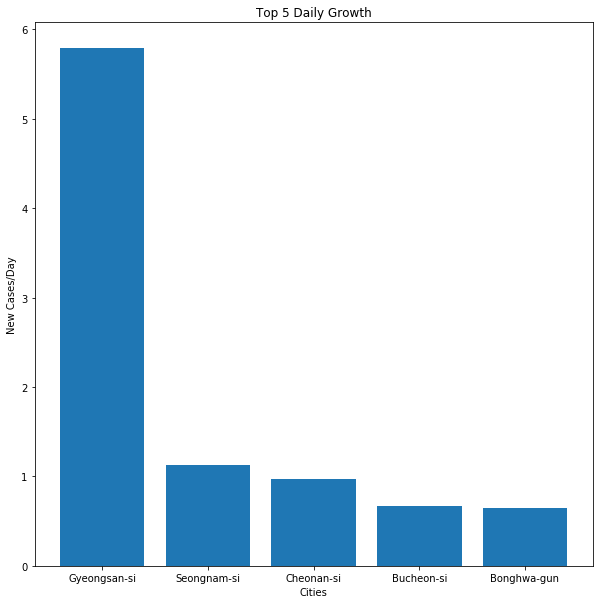

In [214]:
draw_top_growers(5,cases_list,date_low,date_high) # Can change the first input to change the "top" amount

In [215]:
def city_cases(df,date_list,city):
    city_case = list()
    for date in date_list:
        date_1 = choose_dates(df,date)
        try:
            cases = date_1.nodes[city]['Cases']
        except:
            cases = 0
        city_case.insert(0,cases)
    return sorted(city_case,reverse=False)

In [216]:
def plot_time_cases(df,date_list,city):
    city_case = city_cases(df,date_list,city)
    # Data for plotting
    dates = date_list # X
    cases = city_case  # Y

    fig, ax = plt.subplots(figsize=(20,12))
    ax.plot(dates, cases)
    plt.xticks(rotation=45)
    ax.set(xlabel='Dates', ylabel='Cases',
           title='Cases by Date: '+city)
    #ax.grid()

    plt.show()

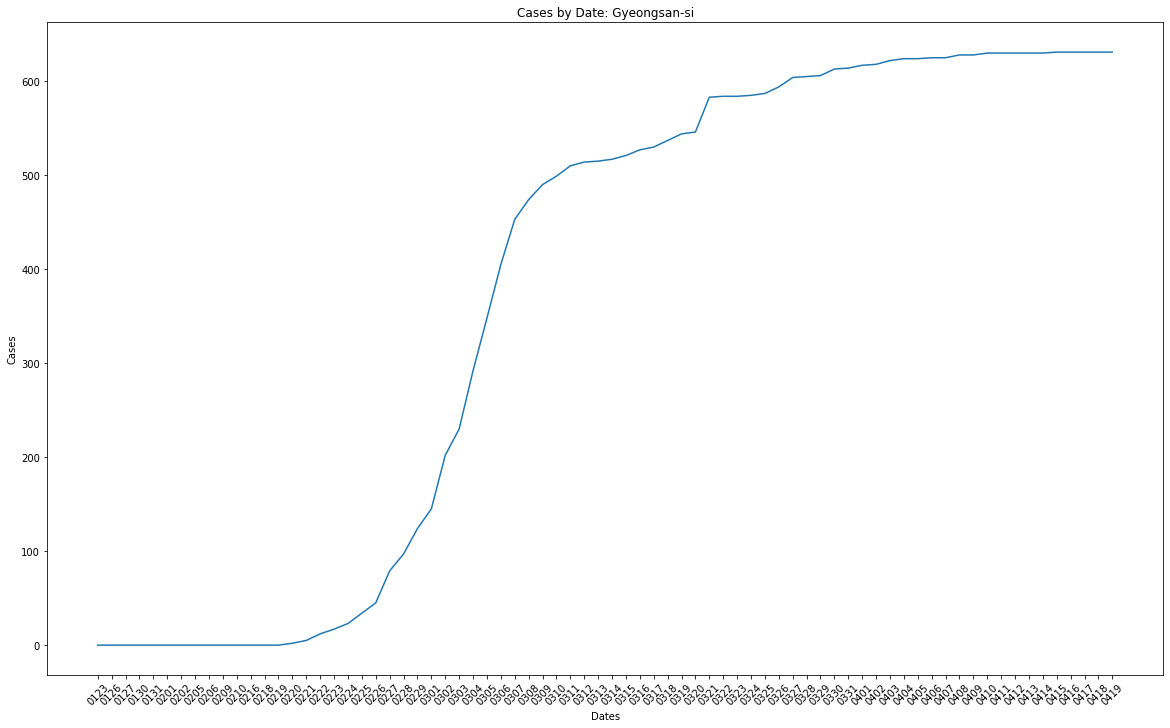

In [217]:
city = 'Gyeongsan-si'
plot_time_cases(df,date_list,city)

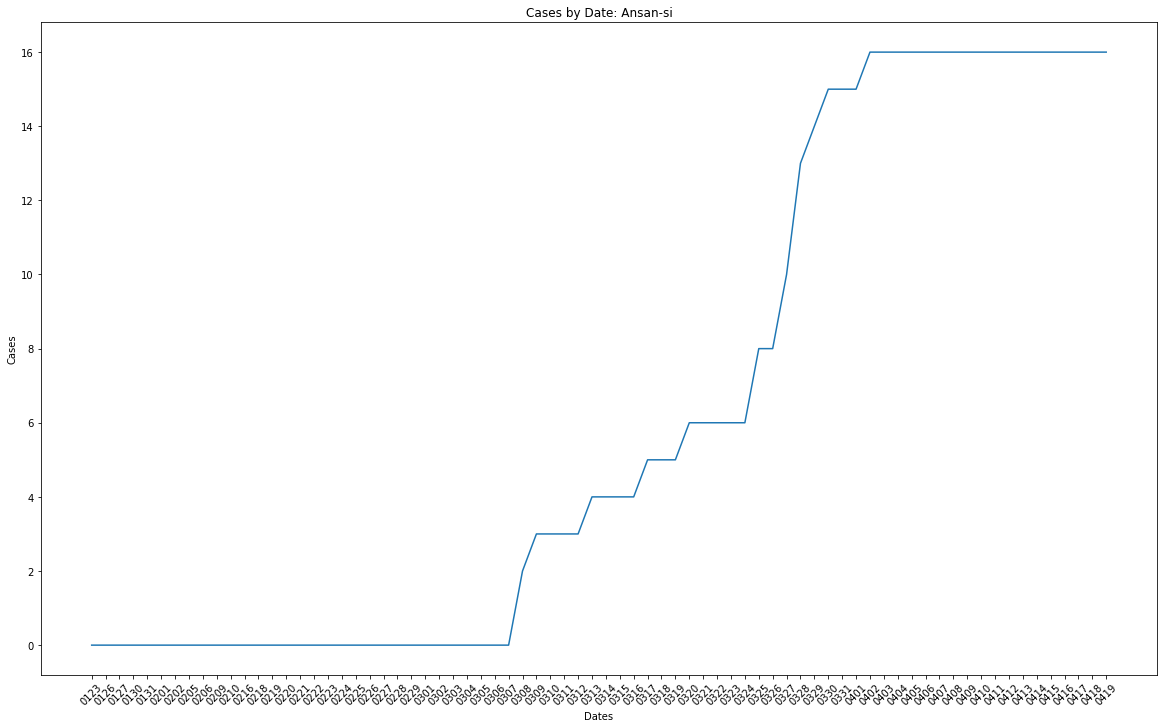

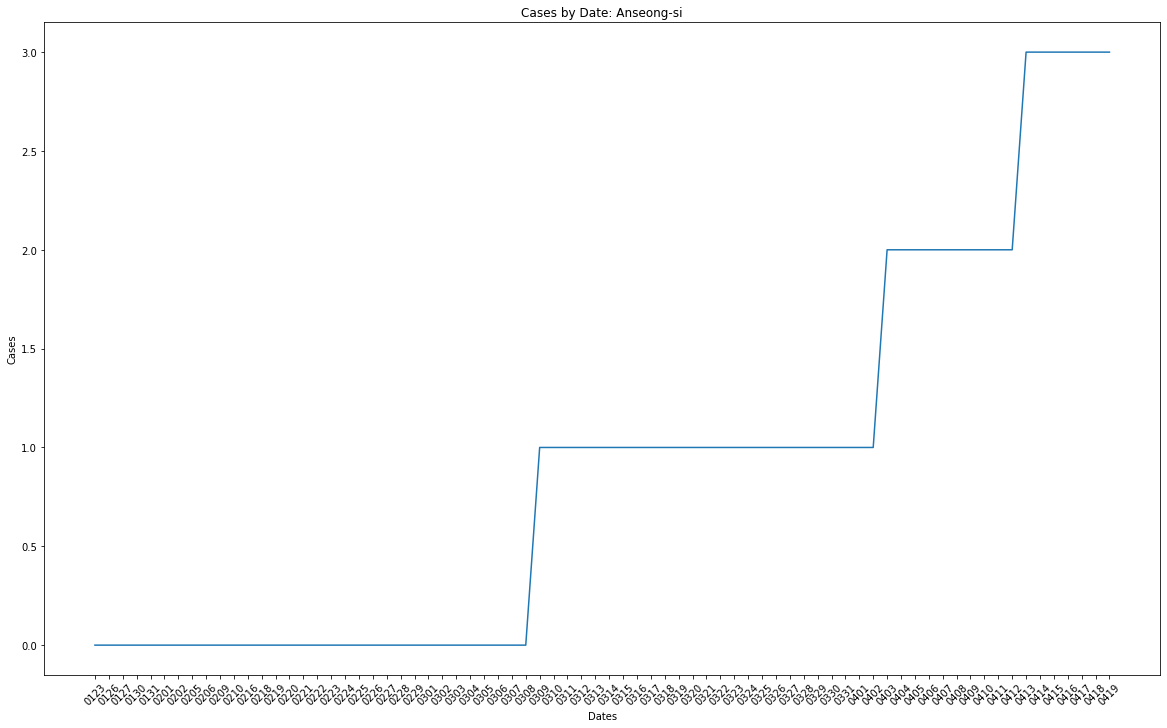

In [218]:
for ii in range(3):
    city = unique_cities[ii]
    plot_time_cases(df,date_list,city)

## The following is for importing the second csv if required

In [ ]:
df_2 = pd.read_csv("PatientRoute.csv", usecols = ['patient_id','city','latitude','longitude'])

In [ ]:
df_2.head()

In [ ]:
#Use patient_id as the index
df_2 = df_2.set_index('patient_id')

In [ ]:
df_2.head()

In [ ]:
#Drop any row with null value
df_2 = df_2.dropna(how='any',axis=0);

#Drop any row with 'city' = etc
df_2 = df_2[~df_2.city.str.contains("etc")];

In [ ]:
df_2.info()

In [ ]:
df_2 = df_2.set_index('city')

In [ ]:
df_2.head()

In [ ]:
#df_test = df_2.drop_duplicates(subset='index', keep='last', inplace=False)
df_test = df_2.loc[~df_2.index.duplicated(keep='last')]

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test.index.sort_values()

In [ ]:
unique_cities

In [ ]:
# def choose_dates(df,date_low,date_high):
#     df_new = df[df['confirmed_date'] > date_low]
#     df_new = df_new[df_new['confirmed_date'] < date_high]
#     graph,node_names,node_sizes,node_size,labels = populate_graph(df_new)
#     graph = get_cases(node_names,node_sizes,graph)
#     return graph
# def ave_growth_per_day(graph_2,date_low,date_high): # WORKS WITH NEW GROWTH FROM A GIVEN DATE 
#     date_diff = (int(date_high) - int(date_low))
#     month_high = (int((int(date_high))/100))
#     month_low = (int((int(date_low))/100))
#     day_high = (int(date_high)%100)
#     day_low = (int(date_low)%100)
#     if((month_high-month_low) == 1):
#         date_diff = day_high + 30 - day_low
#     elif((month_high-month_low) == 2):
#         date_diff = day_high + 60 - day_low
#     elif((month_high-month_low) == 3):
#         date_diff = day_high + 90 - day_low
#     elif((month_high-month_low) == 4):
#         date_diff = day_high + 120 - day_low
#     elif((month_high-month_low) == 5):
#         date_diff = day_high + 150 - day_low
#     print('Case growth per day from',date_low,'to',date_high,'('+str(date_diff),'days)\n')
#     max_cases = 0
#     max_city = ''
#     temp = 0
#     for cities in graph_2.nodes:
#         try:
#             cases = graph_2.nodes[cities]['Cases']
#             temp = cases
#             if (temp > max_cases):
#                 max_cases = temp
#                 max_city = cities
#                 temp = 0
#             if(len(str(cities)) > 13): # FIXES BAD PRINTING
#                 tab = '\t'
#             #elif(len(str(cities)) < 7):
#             #    tab = '\t\t\t'
#             else:
#                 tab = '\t\t'
#             print(cities+':',tab,('{0:.3}').format(cases/date_diff))
#         except:
#             continue
#     print('\nMax daily growth of',('{0:.3}').format(max_cases/date_diff),'at',max_city)

In [ ]:
#import numpy as np
#from matplotlib import pyplot as plt
#from matplotlib.animation import FuncAnimation
#plt.style.use('seaborn-pastel')
#import networkx as nx
#import random

# Graph initialization
#G = nx.Graph()
#G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
#G.add_edges_from([(1,2), (3,4), (2,5), (4,5), (6,7), (8,9), (4,7), (1,7), (3,5), (2,7), (5,8), (2,9), (5,7)])
#colors = ['r', 'b', 'g', 'y', 'w', 'm']
#sizes = [100,400,800,1200,1400,300,900,500,1400]
# Animation function
#def animate(i):
#    nx.draw_circular(G, node_size=[sizes[j] for j in range(9)])
    #nx.draw_circular(G, node_color=[random.choice(colors) for j in range(9)])

#nx.draw_circular(G)
#fig = plt.figure()

# Animator call
#anim = FuncAnimation(fig, animate, frames=20, interval=200, repeat=True)
#anim.save('test.gif', writer='imagemagick')

In [132]:
routes = pd.read_csv("PatientRoute.csv", usecols = ["city","latitude","longitude"])

In [133]:
routes

city   latitude   longitude
0      Gwangjin-gu  37.563992  127.029534
1       Gangbuk-gu  37.592057  127.018898
2       Gangbuk-gu  37.591669  127.018420
3      Seongbuk-gu  37.606498  127.092761
4      Seongbuk-gu  37.612772  127.098167
...            ...        ...         ...
2063   Seongbuk-gu  37.612772  127.098167
2064       Jung-gu  37.460191  126.440696
2065       Mapo-gu  37.578588  126.936251
2066  Seodaemun-gu  37.604279  126.905087
2067  Seodaemun-gu  37.604279  126.905087

[2068 rows x 3 columns]

In [134]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   latitude   2068 non-null   float64
 2   longitude  2068 non-null   float64
dtypes: float64(2), object(1)
memory usage: 48.6+ KB


In [135]:
regions = pd.read_csv("Region.csv", usecols = ["city","latitude","longitude"])

In [136]:
#combines locations and regions 
locations = pd.concat([locations,regions]) 

In [137]:
locations

city   latitude   longitude
0     Gwangjin-gu  37.563992  127.029534
1      Gangbuk-gu  37.592057  127.018898
2      Gangbuk-gu  37.591669  127.018420
3     Seongbuk-gu  37.606498  127.092761
4     Seongbuk-gu  37.612772  127.098167
..            ...        ...         ...
238    Hadong-gun  35.067224  127.751271
239     Haman-gun  35.272481  128.406540
240   Hamyang-gun  35.520541  127.725177
241  Hapcheon-gun  35.566702  128.165870
242       Jeju-do  33.488936  126.500423

[2311 rows x 3 columns]

In [138]:
locations = locations.drop_duplicates(subset = "city", ignore_index=True)

In [139]:
locations

city   latitude   longitude
0     Gwangjin-gu  37.563992  127.029534
1      Gangbuk-gu  37.592057  127.018898
2     Seongbuk-gu  37.606498  127.092761
3       Jongno-gu  37.586288  126.999716
4     Gangdong-gu  37.514544  127.106597
..            ...        ...         ...
233    Hadong-gun  35.067224  127.751271
234     Haman-gun  35.272481  128.406540
235   Hamyang-gun  35.520541  127.725177
236  Hapcheon-gun  35.566702  128.165870
237       Jeju-do  33.488936  126.500423

[238 rows x 3 columns]

In [140]:
templist = set(locations.city)

In [141]:
list2 = set(unique_cities)
len(list2)

138

In [188]:
intermediateNodes = set(locations.city).difference(set(unique_cities))
a

{'Boeun-gun',
 'Boochun-si',
 'Boryeong-si',
 'Boseong-gun',
 'Buan-gun',
 'Busan',
 'Cheongyang-gun',
 'Cheorwon-gun',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Chungdo-gun',
 'Daegu',
 'Daejeon',
 'Damyang-gun',
 'Dangjin-si',
 'Dongducheon-si',
 'Donghae-si',
 'Euijungboo-si',
 'Ganghwa-gun',
 'Gangjin-gun',
 'Gangwon-do',
 'Gapyeong-gun',
 'Geumsan-gun',
 'Gochang-gun',
 'Goheung-gun',
 'Gokseong-gun',
 'Gongju-si',
 'Gunwi-gun',
 'Gurye-gun',
 'Gwachun-si',
 'Gwangju',
 'Gwangsan-gu',
 'Gyeonggi-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do',
 'Hadong-gun',
 'Haenam-gun',
 'Hampyeong-gun',
 'Hoengseong-gun',
 'Hongcheon-gun',
 'Hwacheon-gun',
 'Imsil-gun',
 'Incheon',
 'Jangheung-gun',
 'Jangseong-gun',
 'Jangsu-gun',
 'Jecheon-si',
 'Jeju-si',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Jeongeup-si',
 'Jeongseon-gun',
 'Jinan-gun',
 'Jindo-gun',
 'Kangreung-si',
 'Kwangju-si',
 'Kwangmyung-si',
 'Kwangsan-gu',
 'Kwangyang-si',
 'Muju-gun',
 'Naju-si',
 'Namwon-si',
 'Nonsan-si',
 'Okc

In [149]:
locations.city[0]

'Gwangjin-gu'

In [172]:
pos = {}
count = 0
for nn in locations.city:
    pos[nn] = [locations.latitude[count],locations.longitude[count]]
    count = count+1

In [173]:
pos

{'Gwangjin-gu': [37.563992299999995, 127.0295342],
 'Gangbuk-gu': [37.5920573, 127.0188983],
 'Seongbuk-gu': [37.60649779999999, 127.0927615],
 'Jongno-gu': [37.586288200000006, 126.99971570000001],
 'Gangdong-gu': [37.514543700000004, 127.10659709999999],
 'Jung-gu': [37.5683689, 126.97778999999998],
 'Dobong-gu': [37.6201956, 127.0187418],
 'Jungnang-gu': [37.587894899999995, 127.06532150000001],
 'Mapo-gu': [37.5784186, 126.9099561],
 'Seodaemun-gu': [37.6338843, 126.9165592],
 'Nam-gu': [35.8412055, 128.5982428],
 'Gangnam-gu': [37.4778403, 126.98731529999999],
 'Gwachun-si': [37.4350233, 126.991583],
 'Dongdaemun-gu': [37.5573355, 127.07958899999998],
 'Geumcheon-gu': [37.48526, 126.90148700000002],
 'Songpa-gu': [37.5162581, 127.04221399999999],
 'Nowon-gu': [37.6458568, 127.02857890000001],
 'Gwanak-gu': [37.506975399999995, 126.96052309999999],
 'Kangreung-si': [37.7695698, 128.8784958],
 'Namyangju-si': [37.6360028, 127.2165279],
 'Yongsan-gu': [37.527882500000004, 126.9676321

In [175]:
for extra in a:
    if extra in pos:
        del pos[extra]

In [178]:
len(pos)

138